In [27]:
import pandas as pd
from datetime import datetime
import re
import matplotlib.pyplot as plt
import numpy as np

In [28]:
def convert_row_type(row: list[str], type_list: list[type]):
    converted_values = []
    
    for value, type in zip(row, type_list):
            if type == str:
                value =  re.sub(r'\s+', ' ', value).strip()
                if len(value) > 0:
                    converted_values.append(value)
                else:
                    converted_values.append('')
            elif type == int:
                if value:
                    converted_values.append(int(value))
                else:
                    converted_values.append(None)
            elif type == float:
                if value:
                    converted_values.append(float(value))
                else:
                    converted_values.append(None)
            else:
                converted_values.append(value)
                
    return converted_values

In [29]:
def read_file(file_name: str, type_list: list[type], sep:str="#", index:str=None):
    infile = open(file_name, "r")
    
    line = infile.readline()
    
    data_list = []
    
    while line != "":
        line = line.replace('\n', '').split(sep)            
        data_list.append(line)
        line = infile.readline()
    
    columns = data_list.pop(0)
    
    rows = [convert_row_type(line, type_list) for line in data_list]
    return pd.DataFrame(rows, columns=columns).set_index([index])

In [30]:
cars_df = read_file("cars_pa3.txt", type_list=[str, str, int, float], index="name")
display(cars_df)

,make,manufacture_year,price
name,,,
rockstar,suv,2012,36000.0
suave,sedan,2012,33000.5
trend,truck,2012,42000.0
starship,suv,2014,45000.0
maverick,sedan,2015,25000.0
nebula,truck,2015,45000.0
spiral,sedan,2017,35000.0


In [31]:
reviews_df = read_file("reviews_pa3.txt", type_list=[int, str, str, int, str], sep='\t', index='serial_no')
display(reviews_df)

,name,date,rating,comment
serial_no,,,,
1,rockstar,1-18-2019,3.0,It's alright. Gives me some trouble some times.
2,rockstar,5-11-2019,5.0,Awesome car. Love it.
3,suave,6-15-2019,4.0,Nice car. Have driven it quite a bit with much...
4,trend,6-21-2019,3.0,Had issues with the brakes.
5,maverick,9-15-2019,3.0,Average car .
6,trend,12-18-2019,NaN,
7,suave,3-2-2020,2.0,I do not like it. Don't get it.
8,starship,5-1-2020,4.0,Nice car. Would recommend it.
9,rockstar,6-1-2020,NaN,


In [32]:
def get_datetime(row, data_list:list):
    data_list.append(datetime.strptime(row["date"], "%m-%d-%Y"))

In [33]:
data_list = []
reviews_df.apply(lambda x: get_datetime(x, data_list), axis=1)

reviews_df["year"] = [date.year for date in data_list]
reviews_df["month"] = [date.month for date in data_list]

In [34]:
reviews_df['word_count'] = reviews_df['comment'].apply(lambda comment: len(re.findall(r'\b\S+\b', comment)))

In [35]:
display(reviews_df)

,name,date,rating,comment,year,month,word_count
serial_no,,,,,,,
1,rockstar,1-18-2019,3.0,It's alright. Gives me some trouble some times.,2019,1,8
2,rockstar,5-11-2019,5.0,Awesome car. Love it.,2019,5,4
3,suave,6-15-2019,4.0,Nice car. Have driven it quite a bit with much...,2019,6,11
4,trend,6-21-2019,3.0,Had issues with the brakes.,2019,6,5
5,maverick,9-15-2019,3.0,Average car .,2019,9,2
6,trend,12-18-2019,NaN,,2019,12,0
7,suave,3-2-2020,2.0,I do not like it. Don't get it.,2020,3,8
8,starship,5-1-2020,4.0,Nice car. Would recommend it.,2020,5,5
9,rockstar,6-1-2020,NaN,,2020,6,0


In [36]:
display(reviews_df['rating'].describe())
display(reviews_df['word_count'].describe())

count    18.000000
mean      3.500000
std       1.248529
min       1.000000
25%       3.000000
50%       3.500000
75%       4.750000
max       5.000000
Name: rating, dtype: float64

count    21.000000
mean      4.333333
std       3.439961
min       0.000000
25%       0.000000
50%       5.000000
75%       7.000000
max      11.000000
Name: word_count, dtype: float64

,count_2019,count_2020,count_2021
rating,,,
1.0,0,0,1
2.0,0,1,2
3.0,3,0,2
4.0,1,1,2
5.0,1,0,4


<Figure size 640x480 with 0 Axes>

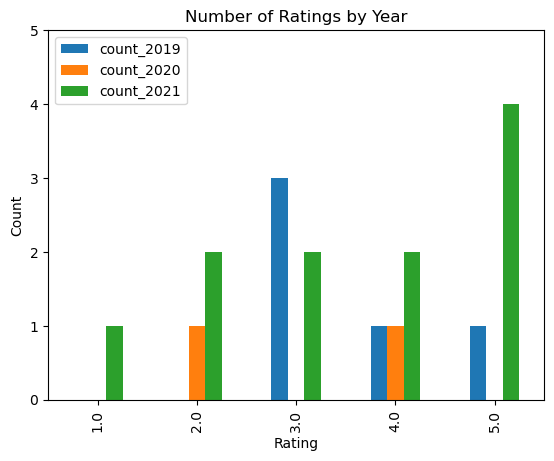

In [37]:
ratings_2019_df = reviews_df[reviews_df['year'] == 2019]['rating'].value_counts()
ratings_2020_df = reviews_df[reviews_df['year'] == 2020]['rating'].value_counts()
ratings_2021_df = reviews_df[reviews_df['year'] == 2021]['rating'].value_counts()

ratings_df_19_21 = pd.merge(ratings_2019_df, ratings_2020_df, how='outer', on='rating')
ratings_df_19_21 = pd.merge(ratings_df_19_21, ratings_2021_df, how='outer', on='rating')

ratings_df_19_21 = ratings_df_19_21.sort_index(ascending=True).fillna(0).astype(int)
ratings_df_19_21.columns = ["count_2019", "count_2020", "count_2021"]

display(ratings_df_19_21)

plt.figure()
ratings_df_19_21.plot(kind='bar')
plt.title("Number of Ratings by Year")
plt.ylabel("Count")
plt.yticks(np.arange(0,6,1))
plt.xlabel("Rating")
plt.show()

,avg_word_count
year,
2019,5.000000
2020,4.333333
2021,4.000000


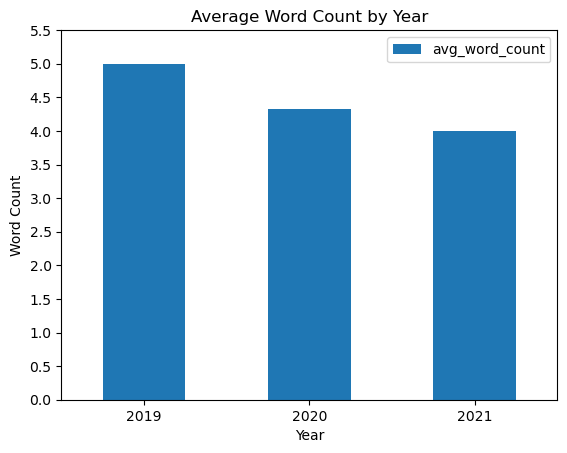

In [38]:
word_count_by_year_df = pd.DataFrame(reviews_df.groupby('year')['word_count'].mean())
word_count_by_year_df.columns=['avg_word_count']
word_count_by_year_df.sort_index(ascending=True)
display(word_count_by_year_df)

plt.Figure()
word_count_by_year_df.plot(kind='bar')
plt.yticks(np.arange(0.0, 6.0, 0.5))
plt.xlabel('Year')
plt.ylabel('Word Count')
plt.title('Average Word Count by Year')
plt.xticks(rotation=0)
plt.show()

In [51]:
def assign_season(month):
    if 1 <= month <= 4:
        return 'Winter'
    elif 5 <= month <= 8:
        return 'Summer'
    else:
        return 'Fall'
    
filtered_df = reviews_df.dropna(subset=["rating", "comment"])
filtered_df = filtered_df[filtered_df["word_count"] > 0]
filtered_df["season"] = filtered_df["month"].apply(assign_season)

filtered_df["year_season"] = filtered_df.apply(lambda row: str(row["year"])
                                               + ("1" if row["season"] == "Winter" else
                                                  "2" if row["season"] == "Summer" else "3"), axis=1)


In [52]:
seasons_years = [season + " " + year[-2:] for season in filtered_df["season"].unique()
                 for year in filtered_df["year"].astype(str).unique()]

year_season = [year + ("1" if season == "Winter" else "2" if season == "Summer" else "3")
               for season in filtered_df["season"].unique()
               for year in filtered_df["year"].astype(str).unique()]

full_df = pd.DataFrame({"seasonname_year": seasons_years, "year_season": year_season})

filtered_df = filtered_df["year_season"].value_counts().to_frame().reset_index()

In [53]:
full_df = full_df.merge(filtered_df, "left", "year_season").fillna(0)

In [54]:
full_df = full_df.sort_values("year_season").set_index("seasonname_year")
full_df["count"] = full_df["count"].astype(int)

,year_season,count
seasonname_year,,
Winter 19,20191,1
Summer 19,20192,3
Fall 19,20193,1
Winter 20,20201,1
Summer 20,20202,1
Fall 20,20203,0
Winter 21,20211,3
Summer 21,20212,0
Fall 21,20213,4


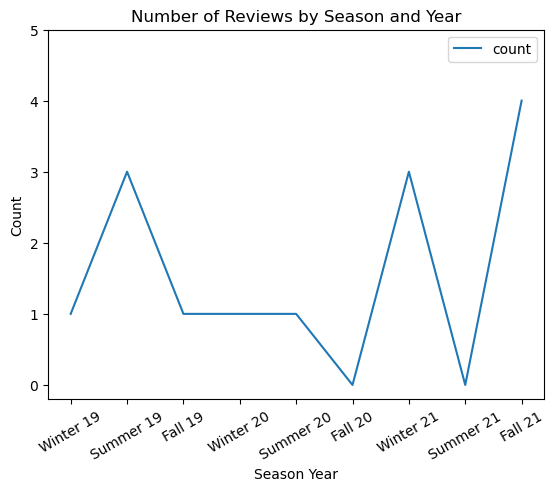

In [55]:
display(full_df)

plt.Figure()
full_df.plot(kind="line")
plt.yticks(np.arange(0,6))
plt.xticks(rotation=30)
plt.xlabel("Season Year")
plt.ylabel("Count")
plt.title("Number of Reviews by Season and Year")
plt.show()

make,sedan,suv,truck
year,,,
2019,3.5,4.0,3.00
2020,2.0,4.0,NaN
2021,4.0,4.0,3.25


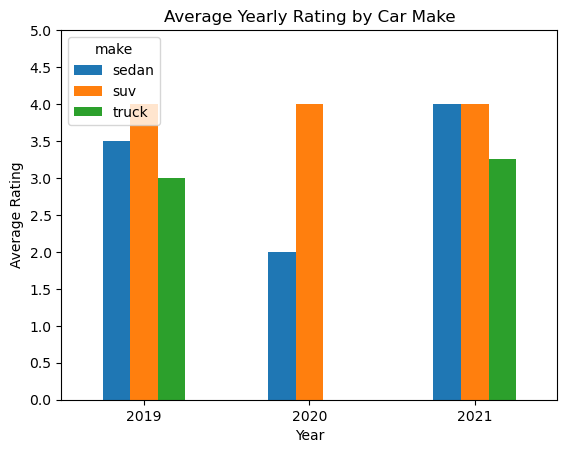

In [56]:
car_review_df = pd.merge(cars_df, reviews_df, how="outer", on="name")
car_review_df = car_review_df.dropna(how="any")
car_review_df = car_review_df[car_review_df["word_count"] > 0]

car_review_df = car_review_df.groupby(["year", "make"])["rating"].mean().reset_index()
pivot_df = pd.pivot(car_review_df, index="year", columns="make", values="rating")

display(pivot_df)

plt.Figure()
pivot_df.plot(kind="bar")
plt.title("Average Yearly Rating by Car Make")
plt.xlabel("Year")
plt.xticks(rotation=0)
plt.ylabel("Average Rating")
plt.yticks(np.arange(0.0, 5.5, 0.5))
plt.show()

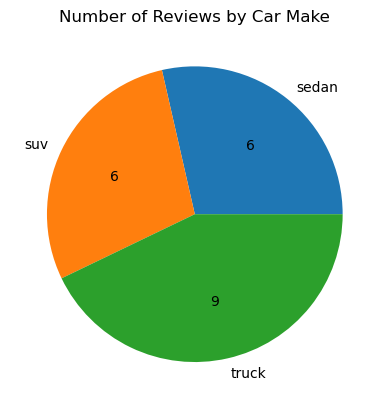

In [45]:
reviews_by_car_make_df = pd.merge(cars_df, reviews_df, "outer", "name")
reviews_by_car_make_df = reviews_by_car_make_df.groupby("make")["comment"].count()

def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{v:d}'.format(v=val)
    return my_autopct

plt.figure()
plt.pie(x=reviews_by_car_make_df.values, labels=reviews_by_car_make_df.index, autopct=make_autopct(reviews_by_car_make_df.values))
plt.title("Number of Reviews by Car Make")
plt.show()

make
sedan    4.047649
suv      4.285714
truck    5.000000
Name: price, dtype: float64
make
sedan    3.0
suv      4.0
truck    4.0
Name: rating, dtype: float64


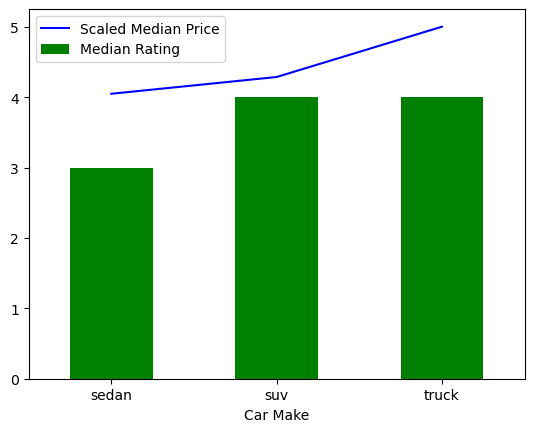

In [46]:
reviews_by_car_make_df = pd.merge(cars_df, reviews_df, "outer", "name")
median_rating_by_make = reviews_by_car_make_df.groupby("make")["rating"].median()
median_price_by_make = reviews_by_car_make_df.groupby("make")["price"].median()

median_price_by_make = median_price_by_make.apply(lambda value: (value / median_price_by_make.max()) * 5)

print(median_price_by_make)
print(median_rating_by_make)

plt.figure()
median_price_by_make.plot(kind="line", color="blue", label="Scaled Median Price")
median_rating_by_make.plot(kind="bar", color="green", label="Median Rating")
plt.legend()
plt.xticks(rotation=0)
plt.xlabel("Car Make")
plt.show()
